In [32]:
#import libraries
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, make_scorer, mean_squared_error


In [45]:
#set some variable before-hand

# If true, include make and model in Random Forest
# Shows how much make and model come into play, but when when we calculate prices
# we should omit to see if the models are overpriced
includeMakeAndModel = True

# Number of trees in forest
nEstimators = 500

#please make sure to enter the correct path of the dataset here
location_of_dataset = "C:/Users/Shubh/Desktop/data.csv/data.csv"


In [34]:
def GetDataMatrix():
    
    # Data frame with make and model
    Xmodelmake = pd.read_csv(location_of_dataset,header=0, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,13,14,));
    
    # Excluding make and model
    if not includeMakeAndModel:
        X = pd.read_csv(location_of_dataset,header=0, usecols=(2,3,4,5,6,7,8,9,10,11,13,14,));
    else:
        X = Xmodelmake
    Y = pd.read_csv(location_of_dataset,header=0, usecols=(15,));

    X, Y, Xmodelmake = shuffle(X, Y, Xmodelmake)
    Xmake = Xmodelmake['Make']
    Xmodel = Xmodelmake['Model']
    
    # Turns categorical data into binary values across many columns
    if not includeMakeAndModel:
        X = pd.get_dummies(X, dummy_na = False, columns=['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] );
    else:    
        X = pd.get_dummies(X, dummy_na = False, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] );
    
    X.insert(0, 'ModelRef', Xmodel);
    X.insert(0, 'MakeRef', Xmake);
    
    # Fill the null values with zeros
    X.fillna(0, inplace=True);
    return (X, Y, Xmodelmake)

#####################################

In [35]:
(X, Y, Xmodelmake) = GetDataMatrix() #Gets the value of X,Y from GetDataMatrix

# Turn into a proper one D arrayY = numpy.ravel(Y);
Y_unraveled = np.ravel(Y);

# Split dataset into training and testing (Here I'm taking 10% data as test dataset and rest for training the model)

print('Splitting into training and testing...')
X_train, X_test, Y_train, y_test = train_test_split(X, Y_unraveled, test_size=0.10, random_state=32)
MSE_Scorer = make_scorer(mean_squared_error);

# Model/Make columns are only used later on to relate indices to Model/Makes
X_train2 = X_train.drop('MakeRef', axis = 1).drop('ModelRef', axis = 1)
X_test2 = X_test.drop('MakeRef', axis = 1).drop('ModelRef', axis = 1)

# Train using Random Forest
print('Training classifier...')

clf = RandomForestRegressor(n_estimators=nEstimators, max_features="sqrt"); #using n_estimators = 500 and max_feature would be square root.
clf = clf.fit(X_train2, Y_train);
print("Done training best classifier.")

Splitting into training and testing...
Training classifier...
Done training best classifier.


In [36]:
Data = pd.read_csv(location_of_dataset,header=0)
dataset=pd.DataFrame(Data)
dataset.head() #output the 5 data from the dataset

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [37]:
# print('Calculating error...')
y_pred = clf.predict(X_test2);
print("Predicted the value using test data")

Predicted the value using test data


In [38]:
folds_cv = 5; # #no of folds =5;
scores = cross_val_score(clf,X_test2,y_test, cv = folds_cv) #clf classifier used is randomforest classifier
print("Scores using cross validation :")
print(scores);
print("Average Score:")
print(sum(scores)/5)
print() #newline

Scores using cross validation :
[0.88958563 0.86443801 0.93361289 0.95384859 0.95066554]
Average Score:
0.918430134147223



In [39]:
#Evaluating mean absolute error and mean percent error

print("Mean absolute error:");
mean_error = sum(abs(y_test-y_pred))/len(y_test);
print(mean_error);
print("Mean percent error: ")
print(mean_error/np.mean(y_test))
print()

Mean absolute error:
2931.288462140496
Mean percent error: 
0.0712087916534065



In [40]:
print("ypred:");
print(y_test);
print(y_pred);
np.savetxt("ypred_test.csv",(y_pred,y_test),delimiter=",");
print() #newline

ypred:
[ 26930   3839  51730 ...  24895 283695   2000]
[ 29324.8495       5387.49716667  47537.90422619 ...  24322.57786935
 283238.83683333   2265.16973333]



In [41]:
# Now some deep analysis is being done and ploted on graph using matplotlib
print("Now some deep analysis is being done and ploted on graph using matplotlib")

Now some deep analysis is being done and ploted on graph using matplotlib


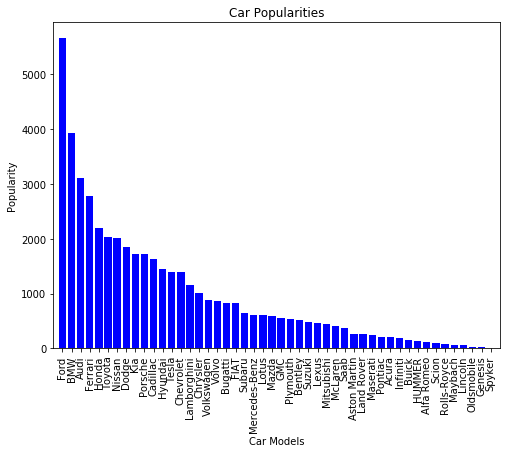

In [42]:
cars = np.asarray(Xmodelmake['Make'])
uniquecarindices = np.unique(cars, return_index=True)[1] 
##[1] in the end of the unique is the source ##The unique() function is used to find the unique elements of an array.Returns the sorted unique elements of an array
cars = np.asarray([cars[index] for index in sorted(uniquecarindices)])

# Make elements in popularities unique and return in same order
popularities = np.asarray(Xmodelmake['Popularity'])
uniquepopularityindices = np.unique(popularities, return_index=True)[1]
popularities = np.asarray([popularities[index] for index in sorted(uniquepopularityindices)])
##print (popularities)
# Get the indices sorted on popularities from highest to lowest
popindices = np.argsort(popularities)[::-1]
##print (popindices)
# Data range
totalN = popindices.shape[0] 
#The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Car Popularities")
plt.bar(range(totalN), popularities[popindices], color="b", align="center") ##align is not needed though but for safety keep it at center
plt.xticks(rotation=90)
plt.xticks(range(totalN), cars[popindices]) #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html 
##plt.xticks(at which location, and name to that location)
plt.xlim([-1, totalN]) #set the x limits from -1 to totalN=48. these are the limits to x bar.
plt.xlabel('Car Models') 
plt.ylabel('Popularity')
plt.show()


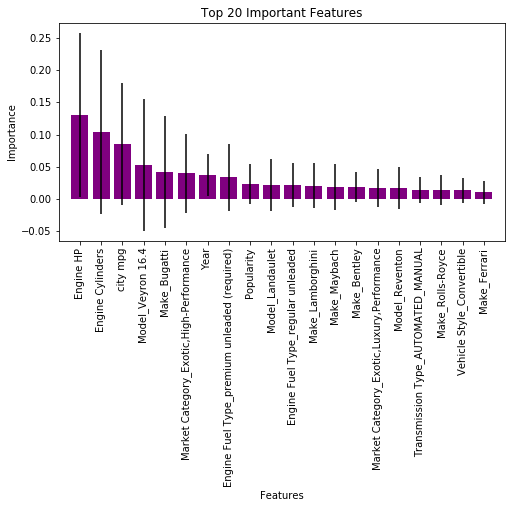

In [43]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
# Get the feature names
features = X_test2.columns.values
# Want the top 20 features, so limit the indices and labels
topLimit = 20 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices] # actual feature labels, we want to print these
# Plot the feature importances of the forest (top 20)
figsize = (8,4)
plt.figure(figsize=figsize)
plt.title("Top 20 Important Features")
plt.xlabel('Features')
plt.ylabel('Importance')
ax = plt.bar(range(topLimit), importances[indices], color="purple", yerr=std[indices])
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.show()

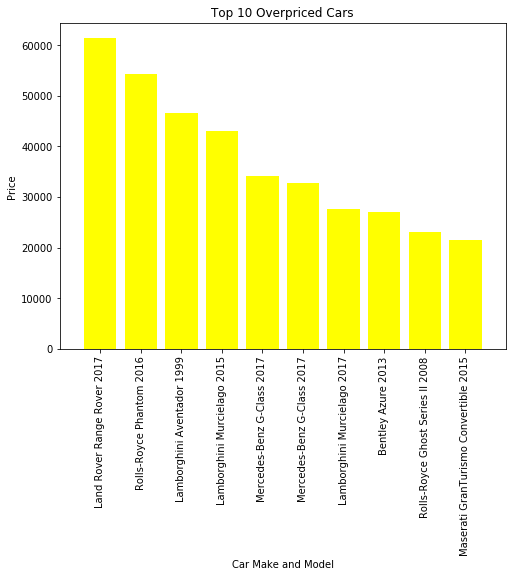

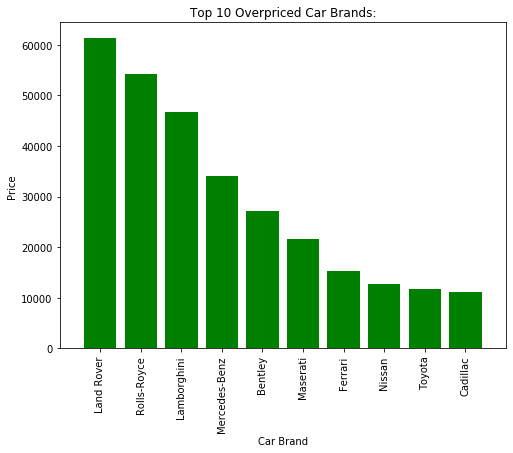

In [44]:
# 2. What cars are the most over-priced for their feature set?

# Get the errors from the prediction and sort from greatest to least
y_error = y_test-y_pred
old_indices = np.argsort(y_error)[::-1] # returns the old indices

# Put top 10 overpriced cars into a list
modelmakelist = []
N = 10 # number of top values to extract
for i in range(N):
    modelmakelist.append(X_test['MakeRef'].iloc[old_indices[i]]
                         + ' ' + X_test['ModelRef'].iloc[old_indices[i]]
                         + ' ' + str(X['Year'].iloc[old_indices[i]]))
modelmakelist = np.asarray(modelmakelist) # don't index into original

# Plot the top 10 overpriced cars against their price
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 10 Overpriced Cars")
plt.bar(range(N), y_error[old_indices[0:N]], color="yellow", align="center")
plt.xticks(rotation=90)
plt.xticks(range(N), modelmakelist)
plt.xlim([-1, N])
plt.xlabel('Car Make and Model')
plt.ylabel('Price')
plt.show()

# Put top 10 overpriced brands into a list
# Scan all entries, if maker already exists, go to next entry, else add maker to list
existingmakers = []
pricelist = []
for i in range(old_indices.shape[0]):
    currentmaker = X_test['MakeRef'].iloc[old_indices[i]]
    if currentmaker not in existingmakers:
        existingmakers.append(currentmaker)
        pricelist.append(y_error[old_indices[i]])
        if len(existingmakers) == N:
            break

existingmakers = np.asarray(existingmakers)
pricelist = np.asarray(pricelist)
    
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 10 Overpriced Car Brands:")
plt.bar(range(N), pricelist, color="g", align="center")
plt.xticks(rotation=90)
plt.xticks(range(N), existingmakers)
plt.xlim([-1, N])
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.show()